In [2]:
import pandas as pd

In [5]:
import os

In [6]:
import numpy as np

In [7]:
from keras.layers import Input, Embedding, Flatten, Dense
from keras.models import Model

2023-04-29 10:20:56.164330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from keras.models import Sequential

In [9]:
import matplotlib.pyplot as plt
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [10]:
import tensorflow_hub as hub

In [11]:
from official.nlp import optimization

/Users/vanord/opt/anaconda3/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [12]:
import scipy

In [13]:
import tensorflow_text as text

In [221]:
# 读取训练集的正面评论
train_pos_dir = "/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/train/pos/"
train_pos_files = [os.path.join(train_pos_dir, f) for f in os.listdir(train_pos_dir) if f.endswith('.txt')]
pos_train = pd.concat([pd.read_csv(f, header=None, names=['review'],delimiter='\t',encoding='utf-8') for f in train_pos_files], ignore_index=True)

# 读取训练集的负面评论
train_neg_dir = "/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/train/neg/"
train_neg_files = [os.path.join(train_neg_dir, f) for f in os.listdir(train_neg_dir) if f.endswith('.txt')]
neg_train = pd.concat([pd.read_csv(f, header=None, names=['review'],delimiter='\t',encoding='utf-8') for f in train_neg_files], ignore_index=True)

# 读取测试集的正面评论
test_pos_dir = "/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/test/pos/"
test_pos_files = [os.path.join(test_pos_dir, f) for f in os.listdir(test_pos_dir) if f.endswith('.txt')]
pos_test = pd.concat([pd.read_csv(f, header=None, names=['review'],delimiter='\t',encoding='utf-8') for f in test_pos_files], ignore_index=True)

# 读取测试集的负面评论
test_neg_dir = "/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/test/neg/"
test_neg_files = [os.path.join(test_neg_dir, f) for f in os.listdir(test_neg_dir) if f.endswith('.txt')]
neg_test = pd.concat([pd.read_csv(f, header=None, names=['review'],delimiter='\t',encoding='utf-8') for f in test_neg_files], ignore_index=True)

In [222]:
# 将训练集和测试集的正面评论和负面评论合并成两个数据集
train = pd.concat([pos_train, neg_train], axis=0)
test = pd.concat([pos_test, neg_test], axis=0)

# 添加标签，1表示正面评论，0表示负面评论
train['label'] = [1]*len(pos_train) + [0]*len(neg_train)
test['label'] = [1]*len(pos_test) + [0]*len(neg_test)

In [223]:
# 打印数据集信息
print(train['label'].value_counts())
print(test['label'].value_counts())

1    12500
0    12500
Name: label, dtype: int64
1    12500
0    12500
Name: label, dtype: int64


In [224]:
df = pd.read_csv('/Users/vanord/Desktop/alphabet/week4/IMDB/name.basics.tsv.gz', delimiter='\t', header=0, dtype={'nconst':str, 'primaryName':str, 'birthYear':str, 'deathYear':str, 'primaryProfession':str, 'knownForTitles':str})

In [225]:
train.head(3)

,review,label
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1


In [226]:
test_movie_id_score_pos=[]

In [227]:
for dirpath, dirnames, filenames in os.walk('/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/test/pos/'):
    for filename in filenames:
        # 提取文件名
        file_name = os.path.splitext(filename)[0]
        # 拆分文件名
        parts = file_name.split('_')
        # 打印拆分结果
        test_movie_id_score_pos.append(parts)

In [228]:
df_test_movie_id_score_pos=pd.DataFrame(test_movie_id_score_pos,columns=['id','score'])

In [229]:
df_test_movie_id_score_pos['label_1']=1

In [230]:
df_test_movie_id_score_pos.head(3)

,id,score,label_1
0,4715,9,1
1,1930,9,1
2,3205,9,1


In [231]:
test_movie_id_score_neg=[]

In [232]:
for dirpath, dirnames, filenames in os.walk('/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/test/neg/'):
    for filename in filenames:
        # 提取文件名
        file_name = os.path.splitext(filename)[0]
        # 拆分文件名
        parts = file_name.split('_')
        # 打印拆分结果
        test_movie_id_score_neg.append(parts)

In [233]:
df_test_movie_id_score_neg=pd.DataFrame(test_movie_id_score_neg,columns=['id','score'])

In [234]:
df_test_movie_id_score_neg['label_1']=0

In [235]:
df_test_movie_id_score_neg.head(3)

,id,score,label_1
0,1821,4,0
1,9487,1,0
2,4604,4,0


In [236]:
df_test_movie_id_score=pd.concat([df_test_movie_id_score_pos, df_test_movie_id_score_neg], axis=0)

In [237]:
df_test_movie_id_score.label_1.value_counts()

1    12500
0    12500
Name: label_1, dtype: int64

In [238]:
test=pd.concat([test,df_test_movie_id_score], axis=1)

In [239]:
test=test.drop(columns='label_1')

In [240]:
test.head(3)

,review,label,id,score
0,"Based on an actual story, John Boorman shows t...",1,4715,9
1,This is a gem. As a Film Four production - the...,1,1930,9
2,"I really like this show. It has drama, romance...",1,3205,9


In [241]:
train_movie_id_score_pos=[]

In [242]:
for dirpath, dirnames, filenames in os.walk('/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/train/pos/'):
    for filename in filenames:
        # 提取文件名
        file_name = os.path.splitext(filename)[0]
        # 拆分文件名
        parts = file_name.split('_')
        # 打印拆分结果
        train_movie_id_score_pos.append(parts)

In [243]:
df_train_movie_id_score_pos=pd.DataFrame(train_movie_id_score_pos,columns=['id','score'])

In [244]:
df_train_movie_id_score_pos.head(3)

,id,score
0,4715,9
1,12390,8
2,8329,7


In [245]:
train_movie_id_score_neg=[]

In [246]:
for dirpath, dirnames, filenames in os.walk('/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/train/neg/'):
    for filename in filenames:
        # 提取文件名
        file_name = os.path.splitext(filename)[0]
        # 拆分文件名
        parts = file_name.split('_')
        # 打印拆分结果
        train_movie_id_score_neg.append(parts)

In [247]:
df_train_movie_id_score_neg=pd.DataFrame(train_movie_id_score_neg,columns=['id','score'])

In [248]:
df_train_movie_id_score_neg['label_1']=0

In [249]:
df_train_movie_id_score_pos['label_1']=1

In [250]:
df_test_movie_id_score_neg.shape

(12500, 3)

In [251]:
df_test_movie_id_score_pos.shape

(12500, 3)

In [252]:
df_train_movie_id_score=pd.concat([df_train_movie_id_score_pos, df_train_movie_id_score_neg], axis=0)

In [253]:
train=pd.concat([train,df_train_movie_id_score], axis=1)

In [254]:
train=train.drop(columns='label_1')

In [255]:
train.head(10)

,review,label,id,score
0,For a movie that gets no respect there sure ar...,1,4715,9
1,Bizarre horror movie filled with famous faces ...,1,12390,8
2,"A solid, if unremarkable film. Matthau, as Ein...",1,8329,7
3,It's a strange feeling to sit alone in a theat...,1,9063,8
4,"You probably all already know this by now, but...",1,3092,10
5,I saw the movie with two grown children. Altho...,1,9865,8
6,You're using the IMDb.<br /><br />You've given...,1,6639,10
7,This was a good film with a powerful message o...,1,10460,10
8,"Made after QUARTET was, TRIO continued the qua...",1,10331,10
9,"For a mature man, to admit that he shed a tear...",1,11606,10


In [256]:
df['knownForTitles']=df['knownForTitles'].apply(lambda x: x.split(','))

In [257]:
df['primaryProfession']=df['primaryProfession'].apply(lambda x: str(x).split(','))

In [258]:
df.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]"
1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]"
2,nm0000003,Brigitte Bardot,1934,\N,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]"


In [259]:
df[df['deathYear']=='\\N']['birthYear'].min()

'0012'

In [260]:
df['deathYear_ab']=df['deathYear'].apply(lambda x: 1 if x.startswith('0') else 0)

In [261]:
df['birthYear_ab']=df['birthYear'].apply(lambda x: 1 if x.startswith('0') else 0)

In [262]:
df=df[(df['deathYear_ab']==0) & (df['birthYear_ab']==0)]

In [263]:
df=df[df['birthYear']!='\\N']

In [264]:
df.shape

(552216, 8)

In [265]:
df['birthYear'].value_counts().index.max()

'2022'

In [266]:
df.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,deathYear_ab,birthYear_ab
0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",0,0
1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",0,0
2,nm0000003,Brigitte Bardot,1934,\N,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",0,0
3,nm0000004,John Belushi,1949,1982,"[actor, soundtrack, writer]","[tt0080455, tt0072562, tt0078723, tt0077975]",0,0
4,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","[tt0050986, tt0060827, tt0050976, tt0083922]",0,0
5,nm0000006,Ingrid Bergman,1915,1982,"[actress, soundtrack, producer]","[tt0077711, tt0038109, tt0036855, tt0034583]",0,0
6,nm0000007,Humphrey Bogart,1899,1957,"[actor, soundtrack, producer]","[tt0034583, tt0037382, tt0042593, tt0043265]",0,0
7,nm0000008,Marlon Brando,1924,2004,"[actor, soundtrack, director]","[tt0047296, tt0068646, tt0070849, tt0078788]",0,0
8,nm0000009,Richard Burton,1925,1984,"[actor, soundtrack, producer]","[tt0057877, tt0059749, tt0087803, tt0061184]",0,0
9,nm0000010,James Cagney,1899,1986,"[actor, soundtrack, director]","[tt0031867, tt0035575, tt0042041, tt0029870]",0,0


In [26]:
df[df['deathYear']=='\\N']

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,deathYear_ab,birthYear_ab
2,nm0000003,Brigitte Bardot,1934,\N,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",0,0
46,nm0000047,Sophia Loren,1934,\N,"[actress, soundtrack]","[tt0076085, tt0058335, tt0054749, tt0060121]",0,0
78,nm0000079,Raquel Welch,1940,\N,"[actress, soundtrack, producer]","[tt0072281, tt0070291, tt0061653, tt0066115]",0,0
83,nm0000084,Gong Li,1965,\N,"[actress, producer]","[tt0473444, tt0101640, tt0397535, tt0430357]",0,0
84,nm0000085,Henner Hofmann,1950,\N,"[cinematographer, producer, camera_department]","[tt0097523, tt0113482, tt1825758, tt0097738]",0,0
...,...,...,...,...,...,...,...,...
11671564,nm9992812,Daisy,1994,\N,[actress],[tt8281190],0,0
11671668,nm9992946,Christoph Blaschke,1993,\N,"[miscellaneous, assistant_director, camera_dep...","[tt17321230, tt9738336, tt10172548, tt11650404]",0,0
11671692,nm9992971,Shamica Anderson,1988,\N,"[editor, cinematographer, producer]","[tt12788416, tt13702196, tt11910974, tt17888710]",0,0
11671893,nm9993199,Denis Nurulin,1997,\N,[actor],"[tt8721954, tt12351166, tt16689786, tt13756156]",0,0


In [27]:
df=df.replace('\\N','2023')

In [28]:
df['age']=df['deathYear'].astype(int)-df['birthYear'].astype(int)

In [29]:
df=df.drop(columns=['deathYear_ab','birthYear_ab'])

In [30]:
df.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age
0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",88
1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",90
2,nm0000003,Brigitte Bardot,1934,2023,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",89
3,nm0000004,John Belushi,1949,1982,"[actor, soundtrack, writer]","[tt0080455, tt0072562, tt0078723, tt0077975]",33
4,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","[tt0050986, tt0060827, tt0050976, tt0083922]",89
5,nm0000006,Ingrid Bergman,1915,1982,"[actress, soundtrack, producer]","[tt0077711, tt0038109, tt0036855, tt0034583]",67
6,nm0000007,Humphrey Bogart,1899,1957,"[actor, soundtrack, producer]","[tt0034583, tt0037382, tt0042593, tt0043265]",58
7,nm0000008,Marlon Brando,1924,2004,"[actor, soundtrack, director]","[tt0047296, tt0068646, tt0070849, tt0078788]",80
8,nm0000009,Richard Burton,1925,1984,"[actor, soundtrack, producer]","[tt0057877, tt0059749, tt0087803, tt0061184]",59
9,nm0000010,James Cagney,1899,1986,"[actor, soundtrack, director]","[tt0031867, tt0035575, tt0042041, tt0029870]",87


In [31]:
df.primaryProfession.value_counts().index[:4]

Index([['actor'], ['actress'], ['nan'], ['writer']], dtype='object')

In [32]:
df['primaryProfession_ab']=df['primaryProfession'].apply(lambda x: 1 if 'nan' in x else 0)

In [33]:
df=df[df['primaryProfession_ab']==0]

In [34]:
df=df.drop(columns=['primaryProfession_ab'])

In [35]:
df['knownForTitles_ab']=df['knownForTitles'].apply(lambda x: 1 if '\\N' in x else 0)

In [36]:
df=df[df['knownForTitles_ab']==0]

In [37]:
df=df.drop(columns='knownForTitles_ab')

In [38]:
assert sum(df['nconst'].str.startswith('nm'))==df.shape[0]

In [39]:
df.shape[0]

478522

In [40]:
occupation_list=[]

In [41]:
range(df.shape[0])

range(0, 478522)

In [42]:
df=df.reset_index()

In [43]:
for i in range(478522):
    for j in df['primaryProfession'][i]:
        if j in occupation_list:
            break
        else:
            occupation_list.append(j)

In [44]:
occupation_list

['soundtrack',
 'actor',
 'miscellaneous',
 'actress',
 'writer',
 'director',
 'composer',
 'music_department',
 'cinematographer',
 'producer',
 'camera_department',
 'editor',
 'art_director',
 'make_up_department',
 'assistant_director',
 'stunts',
 'production_designer',
 'costume_designer',
 'editorial_department',
 'sound_department',
 'visual_effects',
 'production_manager',
 'location_management',
 'costume_department',
 'special_effects',
 'set_decorator',
 'art_department',
 'casting_department',
 'casting_director',
 'script_department',
 'animation_department',
 'transportation_department',
 'manager',
 'talent_agent',
 'executive',
 'publicist',
 'legal',
 'assistant']

In [45]:
len(occupation_list)

38

In [46]:
occupation_dict={}

In [47]:
occupation_enu=enumerate(occupation_list,start=0)

In [48]:
for count, value in occupation_enu:
    occupation_dict.update({count:value})

In [49]:
occupation_dict

{0: 'soundtrack',
 1: 'actor',
 2: 'miscellaneous',
 3: 'actress',
 4: 'writer',
 5: 'director',
 6: 'composer',
 7: 'music_department',
 8: 'cinematographer',
 9: 'producer',
 10: 'camera_department',
 11: 'editor',
 12: 'art_director',
 13: 'make_up_department',
 14: 'assistant_director',
 15: 'stunts',
 16: 'production_designer',
 17: 'costume_designer',
 18: 'editorial_department',
 19: 'sound_department',
 20: 'visual_effects',
 21: 'production_manager',
 22: 'location_management',
 23: 'costume_department',
 24: 'special_effects',
 25: 'set_decorator',
 26: 'art_department',
 27: 'casting_department',
 28: 'casting_director',
 29: 'script_department',
 30: 'animation_department',
 31: 'transportation_department',
 32: 'manager',
 33: 'talent_agent',
 34: 'executive',
 35: 'publicist',
 36: 'legal',
 37: 'assistant'}

In [50]:
new_dict={v:k for k,v in occupation_dict.items()}

In [51]:
new_dict

{'soundtrack': 0,
 'actor': 1,
 'miscellaneous': 2,
 'actress': 3,
 'writer': 4,
 'director': 5,
 'composer': 6,
 'music_department': 7,
 'cinematographer': 8,
 'producer': 9,
 'camera_department': 10,
 'editor': 11,
 'art_director': 12,
 'make_up_department': 13,
 'assistant_director': 14,
 'stunts': 15,
 'production_designer': 16,
 'costume_designer': 17,
 'editorial_department': 18,
 'sound_department': 19,
 'visual_effects': 20,
 'production_manager': 21,
 'location_management': 22,
 'costume_department': 23,
 'special_effects': 24,
 'set_decorator': 25,
 'art_department': 26,
 'casting_department': 27,
 'casting_director': 28,
 'script_department': 29,
 'animation_department': 30,
 'transportation_department': 31,
 'manager': 32,
 'talent_agent': 33,
 'executive': 34,
 'publicist': 35,
 'legal': 36,
 'assistant': 37}

In [52]:
df['occupation']=df['primaryProfession'].apply(lambda x: [new_dict.get(i) for i in x])

In [53]:
df.head(20)

,index,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation
0,0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",88,"[0, 1, 2]"
1,1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",90,"[3, 0]"
2,2,nm0000003,Brigitte Bardot,1934,2023,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",89,"[3, 0, 7]"
3,3,nm0000004,John Belushi,1949,1982,"[actor, soundtrack, writer]","[tt0080455, tt0072562, tt0078723, tt0077975]",33,"[1, 0, 4]"
4,4,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","[tt0050986, tt0060827, tt0050976, tt0083922]",89,"[4, 5, 1]"
5,5,nm0000006,Ingrid Bergman,1915,1982,"[actress, soundtrack, producer]","[tt0077711, tt0038109, tt0036855, tt0034583]",67,"[3, 0, 9]"
6,6,nm0000007,Humphrey Bogart,1899,1957,"[actor, soundtrack, producer]","[tt0034583, tt0037382, tt0042593, tt0043265]",58,"[1, 0, 9]"
7,7,nm0000008,Marlon Brando,1924,2004,"[actor, soundtrack, director]","[tt0047296, tt0068646, tt0070849, tt0078788]",80,"[1, 0, 5]"
8,8,nm0000009,Richard Burton,1925,1984,"[actor, soundtrack, producer]","[tt0057877, tt0059749, tt0087803, tt0061184]",59,"[1, 0, 9]"
9,9,nm0000010,James Cagney,1899,1986,"[actor, soundtrack, director]","[tt0031867, tt0035575, tt0042041, tt0029870]",87,"[1, 0, 5]"


In [54]:
# usr_emb = Embedding(num_embeddings=df.shape[0],
#                 embedding_dim=32,
#                 sparse=False)

In [55]:
df['nconst_id'] = pd.factorize(df['nconst'])[0]

In [56]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65, 75, np.inf], labels=False)

In [57]:
df.head(10)

,index,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin
0,0,nm0000001,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",88,"[0, 1, 2]",0,7.0
1,1,nm0000002,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",90,"[3, 0]",1,7.0
2,2,nm0000003,Brigitte Bardot,1934,2023,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",89,"[3, 0, 7]",2,7.0
3,3,nm0000004,John Belushi,1949,1982,"[actor, soundtrack, writer]","[tt0080455, tt0072562, tt0078723, tt0077975]",33,"[1, 0, 4]",3,2.0
4,4,nm0000005,Ingmar Bergman,1918,2007,"[writer, director, actor]","[tt0050986, tt0060827, tt0050976, tt0083922]",89,"[4, 5, 1]",4,7.0
5,5,nm0000006,Ingrid Bergman,1915,1982,"[actress, soundtrack, producer]","[tt0077711, tt0038109, tt0036855, tt0034583]",67,"[3, 0, 9]",5,6.0
6,6,nm0000007,Humphrey Bogart,1899,1957,"[actor, soundtrack, producer]","[tt0034583, tt0037382, tt0042593, tt0043265]",58,"[1, 0, 9]",6,5.0
7,7,nm0000008,Marlon Brando,1924,2004,"[actor, soundtrack, director]","[tt0047296, tt0068646, tt0070849, tt0078788]",80,"[1, 0, 5]",7,7.0
8,8,nm0000009,Richard Burton,1925,1984,"[actor, soundtrack, producer]","[tt0057877, tt0059749, tt0087803, tt0061184]",59,"[1, 0, 9]",8,5.0
9,9,nm0000010,James Cagney,1899,1986,"[actor, soundtrack, director]","[tt0031867, tt0035575, tt0042041, tt0029870]",87,"[1, 0, 5]",9,7.0


In [58]:
df=df.drop(columns='nconst')

In [59]:
df.head(3)

,index,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin
0,0,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",88,"[0, 1, 2]",0,7.0
1,1,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",90,"[3, 0]",1,7.0
2,2,Brigitte Bardot,1934,2023,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",89,"[3, 0, 7]",2,7.0


In [60]:
nconst_input = Input(shape=(1,), name='nconst_input')

In [61]:
embedding_layer = Embedding(input_dim=df['nconst_id'].nunique(), output_dim=32, name='nconst_embedding')(nconst_input)

In [62]:
flatten_layer = Flatten()(embedding_layer)

In [63]:
hidden_layer = Dense(units=64, activation='relu')(flatten_layer)
output_layer = Dense(units=1, activation='sigmoid')(hidden_layer)

In [64]:
embedding_layer

<KerasTensor: shape=(None, 1, 32) dtype=float32 (created by layer 'nconst_embedding')>

In [65]:
# 定义age输入层
age_input = Input(shape=(1,), name='age_input')

# 定义嵌入层，将age_bin映射为向量表示
embedding_layer = Embedding(input_dim=df['age_bin'].nunique(), output_dim=32, name='age_embedding')(age_input)

In [66]:
# 展平嵌入向量
flatten_layer = Flatten()(embedding_layer)

# 定义全连接层和输出层
hidden_layer = Dense(units=64, activation='relu')(flatten_layer)
output_layer = Dense(units=1, activation='sigmoid')(hidden_layer)

In [67]:
occupation_input = Input(shape=(1,), name='occupation_input')
occupation_embedding = Embedding(input_dim=38, output_dim=32, input_length=1, name='occupation_embedding')(occupation_input)
flatten_layer = Flatten()(occupation_embedding)

In [68]:
hidden_layer = Dense(units=64, activation='relu')(flatten_layer)
output_layer = Dense(units=1, activation='sigmoid')(hidden_layer)

In [69]:
# 构建电影ID编码字典
movie_dict = {}
for index, row in df.iterrows():
    titles = row['knownForTitles']
    for title in titles:
        if title not in movie_dict:
            movie_dict[title] = len(movie_dict)


# 构建embedding模型
max_len = df['knownForTitles'].apply(len).max()  # 最长电影ID序列长度
embedding_size = 16
model = Sequential()
model.add(Embedding(len(movie_dict), embedding_size, input_length=max_len))
model.add(Flatten())



In [268]:
train.head(3)

,review,label,id,score
0,For a movie that gets no respect there sure ar...,1,4715,9
1,Bizarre horror movie filled with famous faces ...,1,12390,8
2,"A solid, if unremarkable film. Matthau, as Ein...",1,8329,7


In [ ]:
test.head(3)

In [89]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [90]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [91]:
vectorize_layer.adapt(train['review'])

NameError: name 'train' is not defined

In [ ]:
def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)

In [ ]:
train_data=vectorize_text(train['review'])

In [ ]:
test_data=vectorize_text(test['review'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc137dcc610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc137dccc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc137cc5ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc137de5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc137de5460>],
 'means': []}

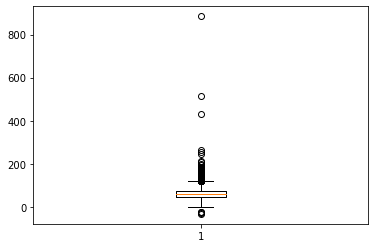

In [70]:
fig, ax = plt.subplots()
ax.boxplot(df['age'])

(array([1.50244764e-05, 1.06883214e-02, 1.08819551e-02, 1.91129551e-04,
        9.65208785e-06, 1.36586149e-07, 1.36586149e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.55287163e-08, 4.55287163e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.55287163e-08]),
 array([-33. ,  12.9,  58.8, 104.7, 150.6, 196.5, 242.4, 288.3, 334.2,
        380.1, 426. , 471.9, 517.8, 563.7, 609.6, 655.5, 701.4, 747.3,
        793.2, 839.1, 885. ]),
 <BarContainer object of 20 artists>)

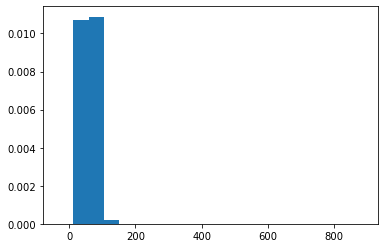

In [71]:
fig, ax = plt.subplots()
ax.hist(df['age'], bins=20, density=True)

In [72]:
df=df[df['age']<=122]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc130e24040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc130e245e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc130e19d30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc130e24b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc130e24e50>],
 'means': []}

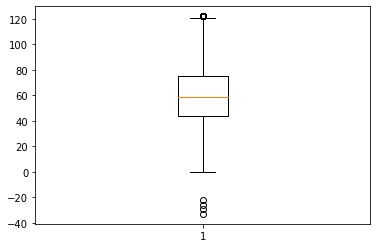

In [73]:
fig, ax = plt.subplots()
ax.boxplot(df['age'])

In [74]:
df=df[df['age']>=10]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc130e76100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc130e766a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc130e6adf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc130e76c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc130e76f10>],
 'means': []}

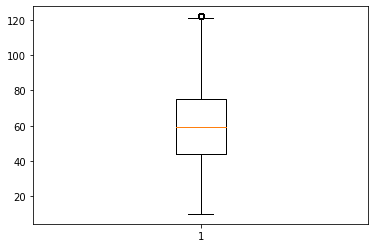

In [75]:
fig, ax = plt.subplots()
ax.boxplot(df['age'])

In [76]:
df['age'].min()

10

In [77]:
df['age'].max()

122

(array([0.00027102, 0.00109121, 0.00320279, 0.00843807, 0.01158576,
        0.01845054, 0.01890562, 0.01505133, 0.01667896, 0.01354439,
        0.01619539, 0.01700172, 0.01304396, 0.01281229, 0.00691989,
        0.00365787, 0.00090228, 0.00027552, 0.00029464, 0.00024816]),
 array([ 10. ,  15.6,  21.2,  26.8,  32.4,  38. ,  43.6,  49.2,  54.8,
         60.4,  66. ,  71.6,  77.2,  82.8,  88.4,  94. ,  99.6, 105.2,
        110.8, 116.4, 122. ]),
 <BarContainer object of 20 artists>)

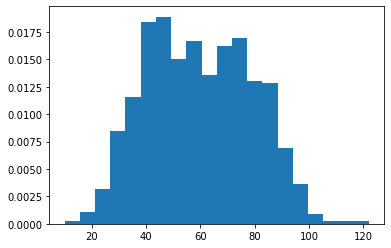

In [78]:
fig, ax = plt.subplots()
ax.hist(df['age'], bins=20, density=True)

In [79]:
# df.duplicated(subset=['primaryName','birthYear'],inplace=True)

In [80]:
df[df.duplicated(subset=['primaryName','birthYear'])]

,index,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin
3399,4519,Vanessa Williams,1963,2023,"[actress, producer, soundtrack]","[tt0102526, tt0248655, tt0112086, tt0103919]",60,"[3, 9, 0]",3399,5.0
6322,10255,Jean Adair,1873,1953,[actress],[tt0013266],80,[3],6322,7.0
6772,11871,Jerry Adler,1929,1993,"[producer, production_manager, miscellaneous]","[tt0072723, tt0259676, tt0083965, tt0065726]",64,"[9, 21, 2]",6772,5.0
10270,25443,Bruce Anderson,1906,1979,[actor],"[tt0856816, tt2339331, tt0352783, tt0043436]",73,[1],10270,6.0
10474,26268,Robert Anderson,1917,2009,"[writer, actor]","[tt0053131, tt0041061, tt0060934, tt0065872]",92,"[4, 1]",10474,7.0
...,...,...,...,...,...,...,...,...,...,...
476456,11321842,Simran Khanna,1952,2023,[actress],"[tt4476002, tt0401916, tt7112704, tt9466630]",71,[3],476456,6.0
477582,11501263,Maximiliano Borghetti,1998,2023,"[music_department, director, actor]","[tt7084640, tt8387348, tt6173104, tt8220332]",25,"[7, 5, 1]",477582,1.0
477647,11510693,Amanda Black,1991,2023,[actress],"[tt4267270, tt6497686, tt11398846]",32,[3],477647,2.0
477704,11520942,Michael Jones,1987,2023,"[cinematographer, actor]","[tt8373620, tt1191056, tt4344922, tt10613768]",36,"[8, 1]",477704,3.0


In [81]:
df1=df

In [82]:
df=df.drop_duplicates(subset=['primaryName','birthYear']).reset_index()

In [83]:
df.shape

(475695, 11)

In [84]:
df.tail(10)

,level_0,index,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin
475685,478512,11671297,Yuki Katayama,1996,2023,[actress],"[tt6340500, tt11928696, tt10344670, tt8185442]",27,[3],478512,2.0
475686,478513,11671315,Nicholas Mata,1988,2023,"[producer, writer]","[tt7344784, tt12925438, tt8741974, tt9635200]",35,"[9, 4]",478513,2.0
475687,478514,11671462,Pardeep Singh Sooch,1987,2023,[actor],"[tt10613832, tt4878326, tt11589366, tt4607112]",36,[1],478514,3.0
475688,478515,11671564,Daisy,1994,2023,[actress],[tt8281190],29,[3],478515,2.0
475689,478516,11671668,Christoph Blaschke,1993,2023,"[miscellaneous, assistant_director, camera_dep...","[tt17321230, tt9738336, tt10172548, tt11650404]",30,"[2, 14, 10]",478516,2.0
475690,478517,11671692,Shamica Anderson,1988,2023,"[editor, cinematographer, producer]","[tt12788416, tt13702196, tt11910974, tt17888710]",35,"[11, 8, 9]",478517,2.0
475691,478518,11671893,Denis Nurulin,1997,2023,[actor],"[tt8721954, tt12351166, tt16689786, tt13756156]",26,[1],478518,2.0
475692,478519,11672058,Fanny Hozleiter,1988,2023,"[director, actress, writer]",[tt8743182],35,"[5, 3, 4]",478519,2.0
475693,478520,11672104,William Riva,1919,1999,[set_decorator],"[tt0300836, tt0189339]",80,[25],478520,7.0
475694,478521,11672105,Frank J. Gaily,1915,2008,[sound_department],[tt0189339],93,[19],478521,7.0


In [ ]:
train.sample(10)

In [ ]:
test.sample(10)

In [12]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [13]:
path = '/Users/vanord/Desktop/alphabet/week4/IMDB/aclImdb/'
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path + 'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path + 'train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path + 'test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [14]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/2',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [15]:
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

2023-04-28 22:08:54.260747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:08:54.261155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:08:54.261272: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:08:54.261612: I tensorflow/core/

In [16]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [18]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :4]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :4]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.7626287   0.99280983 -0.18611895  0.3667383 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946334  0.34321314  0.3323159  ...  0.2130085   0.71020734
  -0.05771102]
 [-0.2874211   0.3198093  -0.23018576 ...  0.58455086 -0.21329764
   0.72692037]
 [-0.6615702   0.68876714 -0.8743296  ...  0.10877301 -0.26173186
   0.47855347]
 [-1.0419861  -0.23945105 -1.3191531  ... -0.3988556  -0.68852174
   1.2575778 ]]


In [19]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [20]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

2023-04-28 22:09:12.926676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:09:12.927070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:09:12.927199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-04-28 22:09:12.927569: I tensorflow/core/

2023-04-28 22:09:14.304842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype string and shape [?]
	 [[{{node inputs}}]]
2023-04-28 22:09:14.334225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]
2023-04-28 22:09:19.065464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{{node inputs}}]]
2023-04-28 2

tf.Tensor([[0.3455571]], shape=(1, 1), dtype=float32)


In [21]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [22]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [23]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [24]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5


2023-04-28 22:09:42.219072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]
2023-04-28 22:09:42.219375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2023-04-28 22:09:42.362612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype int32 and shape [?,128]
	 [[{

2023-04-28 22:09:45.453684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,512]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-04-28 22:09:45.453783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,512]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-04-28 22:09:45.453828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

2023-04-28 22:09:45.827194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype float and shape [?,?,512]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]
2023-04-28 22:09:45.827306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4' with dtype float and shape [?,?,512]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_4}}]]
2023-04-28 22:09:45.827387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) 

625/625 [==============================] - ETA: 0s - loss: 0.4984 - binary_accuracy: 0.7312

2023-04-28 22:43:36.737031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5000]
	 [[{{node Placeholder/_0}}]]
2023-04-28 22:43:36.737366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5000]
	 [[{{node Placeholder/_0}}]]


625/625 [==============================] - 2177s 3s/step - loss: 0.4984 - binary_accuracy: 0.7312 - val_loss: 0.3659 - val_binary_accuracy: 0.8286
Epoch 2/5
625/625 [==============================] - 3694s 6s/step - loss: 0.3304 - binary_accuracy: 0.8515 - val_loss: 0.3827 - val_binary_accuracy: 0.8226
Epoch 3/5
625/625 [==============================] - 7994s 13s/step - loss: 0.2507 - binary_accuracy: 0.8959 - val_loss: 0.3940 - val_binary_accuracy: 0.8444
Epoch 4/5
625/625 [==============================] - 9408s 15s/step - loss: 0.1906 - binary_accuracy: 0.9252 - val_loss: 0.4342 - val_binary_accuracy: 0.8550
Epoch 5/5
625/625 [==============================] - 10815s 17s/step - loss: 0.1527 - binary_accuracy: 0.9435 - val_loss: 0.4816 - val_binary_accuracy: 0.8552


In [25]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2023-04-29 09:43:22.298788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]
2023-04-29 09:43:22.299215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]


782/782 [==============================] - 725s 926ms/step - loss: 0.4691 - binary_accuracy: 0.8550
Loss: 0.46905070543289185
Accuracy: 0.854960024356842


In [267]:
classifier_model

NameError: name 'classifier_model' is not defined

In [27]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-macosx_10_9_x86_64.whl size=1123385 sha256=5e96407cc1376c52cdfff6f188ffbc040899c91a54bd7e89ae9afa75c541e632
  Stored in directory: /Users/vanord/Library/Caches/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise
Note: you may need to restart the kernel to use updated packages.


In [86]:
import surprise

In [87]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split

In [88]:
movielens_data = Dataset.load_builtin('ml-100k')

In [ ]:
trainset = data.build_full_trainset()

In [109]:
movielens_data.head(3)

AttributeError: 'DatasetAutoFolds' object has no attribute 'head'

In [113]:
# df_movie = pd.DataFrame(movielens_data.raw_ratings, columns=['user_id', 'item_id', 'rating', 'timestamp'])

In [93]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [114]:
# df_movie

,user_id,item_id,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
...,...,...,...
99995,880,476,3.0
99996,716,204,5.0
99997,276,1090,1.0
99998,13,225,2.0


In [91]:
pip install --upgrade scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [94]:
movielens_data = Dataset.load_builtin('ml-100k')
df_movie = pd.DataFrame(movielens_data.raw_ratings, columns=['user_id', 'item_id', 'rating', 'timestamp'])

In [97]:
df_movie.head(3)

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116


In [99]:
df['knownForTitles_s']=df['knownForTitles'].apply(lambda x: ','.join(map(str, x)))

In [100]:
df.head(3)

,level_0,index,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin,knownForTitles_s
0,0,0,Fred Astaire,1899,1987,"[soundtrack, actor, miscellaneous]","[tt0050419, tt0031983, tt0053137, tt0072308]",88,"[0, 1, 2]",0,7.0,"tt0050419,tt0031983,tt0053137,tt0072308"
1,1,1,Lauren Bacall,1924,2014,"[actress, soundtrack]","[tt0117057, tt0038355, tt0071877, tt0037382]",90,"[3, 0]",1,7.0,"tt0117057,tt0038355,tt0071877,tt0037382"
2,2,2,Brigitte Bardot,1934,2023,"[actress, soundtrack, music_department]","[tt0056404, tt0049189, tt0054452, tt0057345]",89,"[3, 0, 7]",2,7.0,"tt0056404,tt0049189,tt0054452,tt0057345"


In [103]:
df_movie['item_id'].max()

'999'

In [101]:
merged_data = pd.merge(df, df_movie[['item_id', 'rating']], left_on='knownForTitles_s', right_on='item_id', how='inner')
merged_data.drop_duplicates(subset=['nconst', 'item_id'], inplace=True)

,level_0,index,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,age,occupation,nconst_id,age_bin,knownForTitles_s,item_id,rating


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_data[['nconst_id', 'title', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
movies = ['tt1375666', 'tt0816692', 'tt0848228', 'tt1374989', 'tt2015381', 'tt1211837', 'tt1853728', 'tt0848228', 'tt4154756', 'tt0371746']

for movie in movies:
    for title, score in algo.predict(movie, True):
        print(title, score)

In [ ]:
movielens_data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(movielens_data.raw_ratings, columns=['user_id', 'item_id', 'rating', 'timestamp'])
df.drop('timestamp', axis=1, inplace=True)

merged_data = pd.merge(imdb_data, df[['item_id', 'rating']], left_on='knownForTitles', right_on='item_id', how='inner')
merged_data.drop_duplicates(subset=['nconst', 'item_id'], inplace=True)

# 特征选择和提取
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(merged_data['nconst'])

# 模型训练
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_data[['nconst', 'item_id', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# 相似度计算
movies = ['tt1375666', 'tt0816692', 'tt0848228', 'tt1374989', 'tt2015381', 'tt1211837', 'tt1853728', 'tt0848228', 'tt4154756', 'tt0371746']
indices = [merged_data[merged_data['item_id'] == movie].index[0] for movie in movies]
similarities = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

# 召回相似结果
similarity_scores = similarities.mean(axis=0)
sorted_indices = similarity_scores.argsort()[::-1]
top_similarities = similarity_scores[sorted_indices][:50]
top_movies = merged_data.loc[sorted_indices][:50]['item_id']

print(top_movies)


In [105]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2023-04-29 11:25:37--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: 'ml-100k.zip'

ml-100k.zip         100%[===================>]   4.70M  13.4MB/s    in 0.4s    

2023-04-29 11:25:37 (13.4 MB/s) - 'ml-100k.zip' saved [4924029/4924029]



In [182]:
filmes = pd.read_csv('/Users/vanord/Desktop/ml-100k/u.item', sep = '|', encoding = 'latin-1', header = None, index_col = False)
filmes.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
filmes.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
                 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 
                 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 
                 'Thriller', 'War', 'Western']
filmes.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [184]:
import re

In [185]:
# 将IMDb URL列转换为字符串类型
filmes['IMDb_URL'] = filmes['IMDb_URL'].astype(str)

In [186]:
filmes=filmes.loc[:,:'IMDb_URL'].drop(columns=['movie_id','video_release_date'])

In [187]:
filmes.head(3)

,movie_title,release_date,IMDb_URL
0,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...


In [210]:
pattern = r'\(\d{4}\)'

In [211]:
filmes['year']=filmes['movie_title'].apply(lambda x: re.findall(pattern,x))

In [212]:
filmes.head(3)

,movie_title,release_date,IMDb_URL,year
0,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,[(1995)]
1,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,[(1995)]
2,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,[(1995)]


In [213]:
filmes['year'].astype(str)

0       ['(1995)']
1       ['(1995)']
2       ['(1995)']
3       ['(1995)']
4       ['(1995)']
           ...    
1677    ['(1997)']
1678    ['(1998)']
1679    ['(1998)']
1680    ['(1994)']
1681    ['(1991)']
Name: year, Length: 1682, dtype: object

In [214]:
filmes['year']=filmes['year'].apply(lambda x: ','.join(map(str, x)))

In [215]:
filmes['year']

0       (1995)
1       (1995)
2       (1995)
3       (1995)
4       (1995)
         ...  
1677    (1997)
1678    (1998)
1679    (1998)
1680    (1994)
1681    (1991)
Name: year, Length: 1682, dtype: object

In [216]:
filmes['year']=filmes['year'].apply(lambda x: x.replace('(', '').replace(')', ''))

In [217]:
filmes['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1677    1997
1678    1998
1679    1998
1680    1994
1681    1991
Name: year, Length: 1682, dtype: object

In [218]:
filmes['title']=filmes['movie_title'].apply(lambda x:x.split('(')[0].strip())

In [219]:
filmes['title']

0             Toy Story
1             GoldenEye
2            Four Rooms
3            Get Shorty
4               Copycat
             ...       
1677         Mat' i syn
1678          B. Monkey
1679      Sliding Doors
1680       You So Crazy
1681    Scream of Stone
Name: title, Length: 1682, dtype: object

NameError: name 'test' is not defined